In [280]:
import numpy as np
import matplotlib.pyplot as plt

# Least Squares for Classification

Source: CS189, Spring 2018, UC Berkeley

Classification is an important problem in applied machine learning and is used in many different applications like image classification, object detection, speech recognition, machine translation and others.
In classification, we assign each datapoint a class from a finite set (for example the image of a digit could be assigned the value 0,1,...,9 of that digit). This is different from regression, where each datapoint is assigned a value from a continuous domain like $\mathbb{R}$ (for example features of a house like location, number of bedrooms, age of the house, etc. could be assigned the price of the house).

In this problem we consider the simplified setting of classification where we want to classify data points from $\mathbb{R}^d$ into two classes. For a linear classifier, the space $\mathbb{R}^d$ is split into two parts by a hyperplane: All points on one side of the hyperplane are classified as one class and all points on the other side of the hyperplane are classified as the other class.

The goal of this problem is to show that even a regression technique like linear regression can be used to solve a classification problem. This can be achieved by regressing the data points in the training set against −1 or 1 depending on their class and then using the level set of 0 of the regression function as the classification hyperplane (i.e. we use 0 as a threshold on the output to decide between the classes).

(a) **Visualizing data:** The dataset used in this exercise is a subset of the MNIST dataset. The MNIST dataset assigns each image of a handwritten digit their value from 0 to 9 as a class. For this problem we only keep digits that are assigned a 0 or 1, so we simplify the problem to a two-class classification problem.
Visualize three images that are labeled as 0 and three images that are labeled as 1.

In [281]:
# Load the training dataset
train_features = np.load("train_features.npy")
train_labels = np.load("train_labels.npy").astype("int8")

n_train = train_labels.shape[0]

def visualize_digit(features, label):
    # Digits are stored as a vector of 400 pixel values. Here we
    # reshape it to a 20x20 image so we can display it.
    plt.imshow(features.reshape(20, 20), cmap="binary")
    plt.xlabel("Digit with label " + str(label))
    plt.show()


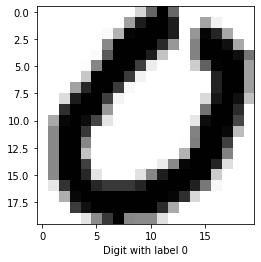

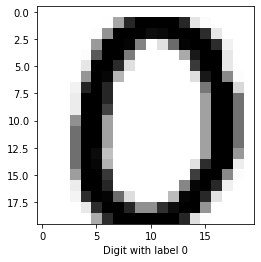

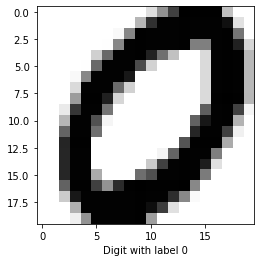

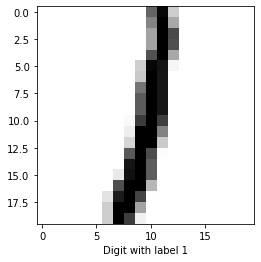

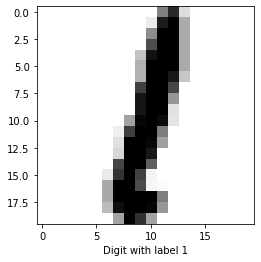

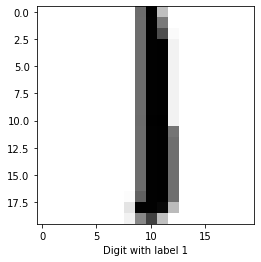

In [282]:
# TODO: Plot three images with label 0 and three images with label 1

# print(train_features[0].shape)
visualize_digit(train_features[2],0)
visualize_digit(train_features[3],0)
visualize_digit(train_features[5],0)
visualize_digit(train_features[0],1)
visualize_digit(train_features[1],1)
visualize_digit(train_features[4],1)

(b) **Solving linear regression problem**. We now want to use linear regression for the problem, treating class labels as real values y = −1 for class “zero” and y = 1 for class “one”. In the dataset we provide, the images have already been flattened into one dimensional vectors (by concatenating all pixel values of the two dimensional image into a vector) and stacked as rows into a feature matrix X. We want to set up the regression problem $\min_w ∥Xw − y∥^2$ where the entry $y_i$ is the value of the class (−1 or 1) corresponding to the image in row $x_i^\top$ of the feature matrix. Solve this regression problem for the training set and report the value of $∥Xw − y∥^2$ as well as the weights $w$. For this problem you may only use pure Python and numpy (no machine learning libraries!).

In [283]:
# TODO: Solve the linear regression problem

X = train_features
# print("X shape:",X.shape)
y = 2 * train_labels - 1
# print("y shape:",y.shape)
W,residuals,rank,C = np.linalg.lstsq(X, y, rcond = None)
# print("W shape:",W.shape)
# print(np.sqrt(residuals)[0])
print("residuals:",np.sqrt(residuals[0]))

residuals: 20.560904860733494


In [284]:
# TODO: Report the residual error and the weight vector

predicted_labels = np.dot(X,W)
# print(predicted_labels)

corrected_predicted = np.zeros(len(predicted_labels))
for i in range(len(predicted_labels)):
    corrected_predicted[i] = (1 if (predicted_labels[i] > 0) else -1)
    # print(predicted_labels[i], corrected_predicted[i])

error_train = 0
for i in range(len(corrected_predicted)):
    if corrected_predicted[i] != y[i]: error_train = error_train + 1
print("number of errors:",error_train)

print("residual error:",np.sqrt(residuals)[0])

print("weight vector:", W)


number of errors: 28
residual error: 20.560904860733494
weight vector: [-3.30801139e-01  3.91726636e-01  1.48153634e-01 -1.60602318e-01
  1.03277284e-01 -1.96941103e-02 -1.27705114e-01  9.45889276e-03
 -1.71493893e-02 -5.67518079e-03 -4.69069786e-03 -1.12641776e-02
 -5.71029120e-03  4.59008401e-03  1.78762857e-02 -3.00976494e-02
  1.00373536e-02 -6.45811914e-02 -2.30413879e-02 -2.63012485e-02
 -1.63458898e-01  4.67076721e-01 -2.82694076e-03 -1.05642710e-01
 -1.80703185e-01  1.34413187e-01 -5.09450682e-03 -3.07269166e-02
 -6.59225173e-02  1.76021545e-02 -3.06512637e-02 -6.22918718e-03
  1.54059878e-02 -3.13653554e-02 -2.52826819e-03 -6.17331537e-03
 -1.02623406e-03  5.19405643e-02  3.95632027e-02  6.29594620e-02
 -3.88408603e-01 -2.16922478e-01 -9.80431113e-02  1.68330198e-01
 -5.70891161e-02  1.50769252e-02  2.43554088e-03  2.72974893e-02
  6.30415690e-02 -2.69231967e-02  7.73327627e-03 -1.71158562e-02
 -5.02592486e-02  8.06240492e-03 -6.38849770e-03 -1.26750594e-02
  1.55050383e-02 -1

(c) **Evaluating Learned Model.** Given a new flattened image x, one natural rule to classify it is the following one: It is a zero if $x^\top w \leq 0$ and a one if $x^\top w > 0$. Report what percentage of the digits in the training set are correctly classified by this rule. Report what percentage of the digits in the test set are correctly classified by this rule.

In [285]:
# Load the test dataset
# It is good practice to do this after the training has been
# completed to make sure that no training happens on the test
# set!
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy").astype("int8")

n_test = test_labels.shape[0]

In [286]:
# TODO: Implement the classification rule and evaluate it
# on the training and test set

X_test = test_features
y_test = 2 * test_labels - 1
# print(y_test.shape)
# print(y_test.shape)

predicted_test = np.dot(X_test,W)
# print(W.shape)

corrected_test = np.zeros(len(predicted_test))
for i in range(len(predicted_test)):
    corrected_test[i] = (1 if (predicted_test[i] > 0) else -1)

error_test = 0
for i in range(len(corrected_test)):
    if corrected_test[i] != y_test[i]: error_test = error_test + 1
print("number of errors:",error_test)
print("percentage correctly classified:",(n_test - error_test) / n_test * 100, "%")

number of errors: 4
percentage correctly classified: 99.81087470449172 %


## Compare with Logistic Regression

In [287]:
# Logistic Regression

# You can also compare against how well logistic regression is doing.

import sklearn.linear_model
X = train_features
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X, train_labels)

test_error_lr = 1.0 * sum(lr.predict(test_features) != test_labels) / n_test
print("Logistic Test Accuracy," + str(1 - test_error_lr))

Logistic Test Accuracy,0.9995271867612293
